In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/surface-temperatures/monthly-average-surface-temperatures-by-year.csv
/kaggle/input/atm-co2/co2-long-term-concentration.csv
/kaggle/input/climate-insights-dataset/climate_change_data.csv
/kaggle/input/climate-insights-dataset/Readme.md
/kaggle/input/combined-df/combined_emissions_temperatures.csv
/kaggle/input/co2-emissions/annual-co2-emissions-per-country.csv


In [2]:
emissions = pd.read_csv('/kaggle/input/co2-emissions/annual-co2-emissions-per-country.csv')
emissions

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
30303,Zimbabwe,ZWE,2018,10714598.0
30304,Zimbabwe,ZWE,2019,9775428.0
30305,Zimbabwe,ZWE,2020,7849639.0
30306,Zimbabwe,ZWE,2021,8396158.0


In [3]:
temps = pd.read_csv('/kaggle/input/surface-temperatures/monthly-average-surface-temperatures-by-year.csv')
temps

,Entity,Code,Year,2024,2023,2022,2021,2020,2019,2018,...,1959,1958,1956,1954,1952,1957,1955,1953,1951,1950
0,Afghanistan,AFG,1,3.300021,-4.335636,-0.322889,-1.001634,-2.560551,0.585135,1.042428,...,-2.333824,0.576411,-3.351916,-2.276668,-2.812624,-4.239197,-2.191659,-2.915972,-3.126314,-2.655654
1,Afghanistan,AFG,2,1.024519,4.187047,2.165834,5.687983,2.879998,0.068683,3.622795,...,-1.545520,0.264953,0.455322,-0.304211,0.798207,-2.747961,1.999065,1.983401,-2.642804,-3.996033
2,Afghanistan,AFG,3,5.843495,10.105426,10.483649,9.777937,6.916707,5.758016,10.794393,...,5.942876,7.716424,5.090312,4.357680,4.796120,4.433993,7.066073,4.590386,3.054347,3.491104
3,Afghanistan,AFG,4,11.627375,14.277130,17.227598,15.168252,12.686830,13.838787,14.321172,...,13.752793,14.712857,11.982361,12.155213,13.119213,8.263815,10.418738,11.087168,9.682854,8.332767
4,Afghanistan,AFG,5,18.957808,19.078136,19.962687,19.885850,18.883999,18.461248,18.100754,...,17.388676,16.352020,20.125408,18.432030,17.614790,15.505902,15.599692,17.865068,17.095724,17.329050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,Zimbabwe,ZWE,8,NaN,19.403452,19.753551,19.462015,19.551117,20.487617,20.950813,...,17.612135,16.712189,18.440218,17.719843,19.090275,18.095684,18.136015,17.905958,18.268738,16.899980
2336,Zimbabwe,ZWE,9,NaN,24.119762,22.904684,22.942026,22.324991,21.619644,24.267824,...,20.173260,22.143229,21.178660,21.947569,22.857792,23.418322,20.860146,19.606543,22.978992,21.662410
2337,Zimbabwe,ZWE,10,NaN,25.584272,26.157350,24.196490,24.388079,26.052183,23.404940,...,24.501074,22.578552,25.097818,26.028152,25.985360,25.396238,24.659395,25.414352,25.337086,23.743790
2338,Zimbabwe,ZWE,11,NaN,26.318153,23.657757,26.291475,26.156446,26.459396,24.858053,...,23.302542,23.289469,21.473963,23.762419,23.684355,25.594784,23.108038,24.888700,25.800379,24.359060


In [4]:
# Renombrar la columna 'Year' a 'Month' en temps
temps = temps.rename(columns={'Year': 'Month'})

# Transformar los datos mensuales a anuales
temps_melted = temps.melt(id_vars=['Entity', 'Code', 'Month'], var_name='Year', value_name='Temp')

# convertir 'year' a formato numérico
temps_melted['Year'] = pd.to_numeric(temps_melted['Year'])

# calcular temperatura media anual
annual_temps = temps_melted.groupby(['Entity', 'Code', 'Year']).agg({'Temp': 'mean'}).reset_index()

# Eliminar valores nulos
annual_temps = annual_temps.dropna()
emissions = emissions.dropna()

# Unir los datasets en base a 'Entity', 'Code' y 'Year'
combined_data = pd.merge(emissions, annual_temps, on=['Entity', 'Code', 'Year'])

# Renombrar la columna de temperatura promedio
combined_data = combined_data.rename(columns={'Temp': 'Annual Average Temperature'})

# Guardar el dataframe combinado en un archivo CSV
file_path = 'combined_emissions_temperatures.csv'
combined_data.to_csv(file_path, index=False)

In [5]:
data = pd.read_csv('/kaggle/input/combined-df/combined_emissions_temperatures.csv')
data[data['Entity'] == 'World']

,Entity,Code,Year,Annual CO₂ emissions,Annual Average Temperature
12884,World,OWID_WRL,1950,5.929342e+09,13.604360
12885,World,OWID_WRL,1951,6.381406e+09,13.736754
12886,World,OWID_WRL,1952,6.467437e+09,13.720969
12887,World,OWID_WRL,1953,6.650862e+09,13.798089
12888,World,OWID_WRL,1954,6.789497e+09,13.601195
...,...,...,...,...,...
12952,World,OWID_WRL,2018,3.676694e+10,14.635232
12953,World,OWID_WRL,2019,3.704010e+10,14.770578
12954,World,OWID_WRL,2020,3.500774e+10,14.803513
12955,World,OWID_WRL,2021,3.681654e+10,14.645040


In [6]:
# Filtrar los datos para solo incluir las filas con 'World'
world_data = data[data['Entity'] == 'World'].copy()

# Convertir las emisiones de toneladas a billones (métrica americana) de toneladas
world_data.loc[:, 'Annual CO₂ emissions'] = world_data['Annual CO₂ emissions'] / 1e9

# Redondear las columnas a 2 decimales
world_data['Annual CO₂ emissions'] = world_data['Annual CO₂ emissions'].round(2)
world_data['Annual Average Temperature'] = world_data['Annual Average Temperature'].round(2)

# Resetear el índice del dataframe
world_data.reset_index(drop=True, inplace=True)

world_data = world_data.drop(columns=['Code'])

# Guardar el dataframe modificado en un nuevo archivo CSV
world_data.to_csv('world_emissions_temperatures.csv', index=False)

# Mostrar el dataframe modificado
world_data

,Entity,Year,Annual CO₂ emissions,Annual Average Temperature
0,World,1950,5.93,13.60
1,World,1951,6.38,13.74
2,World,1952,6.47,13.72
3,World,1953,6.65,13.80
4,World,1954,6.79,13.60
...,...,...,...,...
68,World,2018,36.77,14.64
69,World,2019,37.04,14.77
70,World,2020,35.01,14.80
71,World,2021,36.82,14.65


Error cuadrático medio (MSE): 0.0114135100404632
Coeficiente de determinación (R^2): 0.9187226307410996


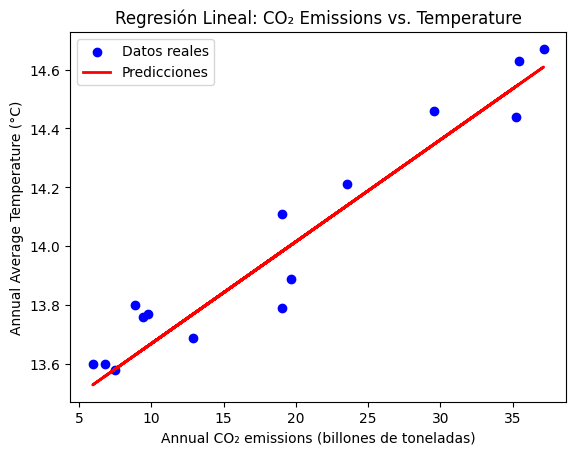

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Definir las características (X) y la variable objetivo (y)
X = world_data['Annual CO₂ emissions']
y = world_data['Annual Average Temperature']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una instancia del modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse}')
print(f'Coeficiente de determinación (R^2): {r2}')

# Visualizar los resultados
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.xlabel('Annual CO₂ emissions (billones de toneladas)')
plt.ylabel('Annual Average Temperature (°C)')
plt.title('Regresión Lineal: CO₂ Emissions vs. Temperature')
plt.legend()
plt.show()


In [10]:
# Obtener el coeficiente (pendiente) y el intercepto de la regresión lineal
coeficiente = model.coef_[0]
intercepto = model.intercept_

print(f'Coeficiente (pendiente) de emisiones: {coeficiente}')
print(f'Intercepto: {intercepto}')

# La ecuación de regresión lineal es: y = coeficiente * X + intercepto
print(f'La ecuación de regresión lineal es: AVG temperature = {coeficiente:.2f} * CO2 emissions + {intercepto:.2f}')

Coeficiente (pendiente) de emisiones: 0.03457322111304677
Intercepto: 13.324305973546368
La ecuación de regresión lineal es: AVG temperature = 0.03 * CO2 emissions + 13.32
